In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [36]:
# Load the dataset
data = pd.read_csv('/Users/piyushkulkarni/Desktop/Loan_Approval_Prediction/Loan_Approval_Prediction_Flask_ML_project/Data/financial_risk_assessment.csv')

In [37]:
# Display the first few rows to understand the data
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Age      Gender Education Level Marital Status   Income  Credit Score  \
0   49        Male             PhD       Divorced  72799.0         688.0   
1   57      Female      Bachelor's        Widowed      NaN         690.0   
2   21  Non-binary        Master's         Single  55687.0         600.0   
3   59        Male      Bachelor's         Single  26508.0         622.0   
4   25  Non-binary      Bachelor's        Widowed  49427.0         766.0   

   Loan Amount Loan Purpose Employment Status  Years at Current Job  \
0      45713.0     Business        Unemployed                    19   
1      33835.0         Auto          Employed                     6   
2      36623.0         Home          Employed                     8   
3      26541.0     Personal        Unemployed                     2   
4      36528.0     Personal        Unemployed                    10   

  Payment History  Debt-to-Income Ratio  Assets Value  Number of Dependents  \
0     

In [38]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Age                         0
Gender                      0
Education Level             0
Marital Status              0
Income                   2250
Credit Score             2250
Loan Amount              2250
Loan Purpose                0
Employment Status           0
Years at Current Job        0
Payment History             0
Debt-to-Income Ratio        0
Assets Value             2250
Number of Dependents     2250
City                        0
State                       0
Country                     0
Previous Defaults        2250
Marital Status Change       0
Risk Rating                 0
dtype: int64


In [39]:
# Handle missing values
for column in data.columns:
    if data[column].dtype == 'object':  # Categorical
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:  # Numerical
        data[column].fillna(data[column].median(), inplace=True)  # Changed to median

/var/folders/t7/4rz7cdzx7jn12k94_3phky8m0000gn/T/ipykernel_26734/1726719839.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)  # Changed to median
/var/folders/t7/4rz7cdzx7jn12k94_3phky8m0000gn/T/ipykernel_26734/1726719839.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whi

In [40]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Age                      0
Gender                   0
Education Level          0
Marital Status           0
Income                   0
Credit Score             0
Loan Amount              0
Loan Purpose             0
Employment Status        0
Years at Current Job     0
Payment History          0
Debt-to-Income Ratio     0
Assets Value             0
Number of Dependents     0
City                     0
State                    0
Country                  0
Previous Defaults        0
Marital Status Change    0
Risk Rating              0
dtype: int64


In [41]:
# Filter numerical columns (integers and floats)
numerical_cols = data.select_dtypes(include=['int64', 'float64'])

In [42]:
# Count the numerical columns
num_numerical_cols = numerical_cols.shape[1]

In [43]:
# Print the result
print(f"Number of numerical columns: {num_numerical_cols}")

Number of numerical columns: 10


In [44]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 15000 non-null  float64
 5   Credit Score           15000 non-null  float64
 6   Loan Amount            15000 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           15000 non-null  float64
 13  Number of Dependents   15000 non-null  float64
 14  City                   15000 non-null  object 
 15  St

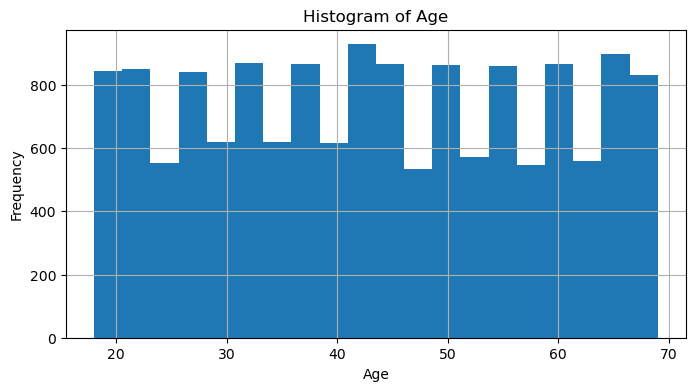

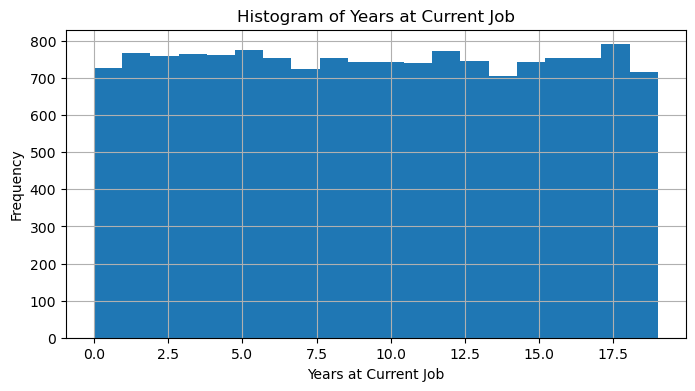

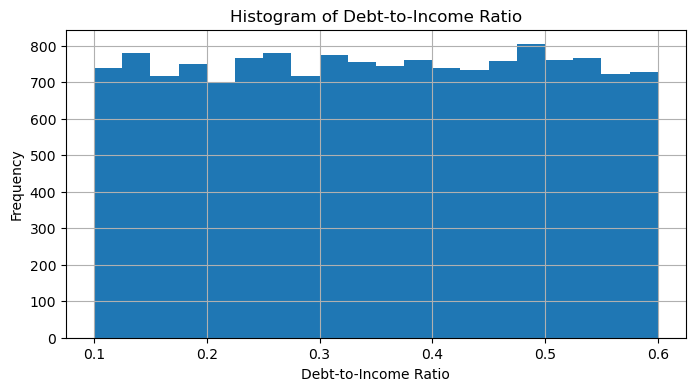

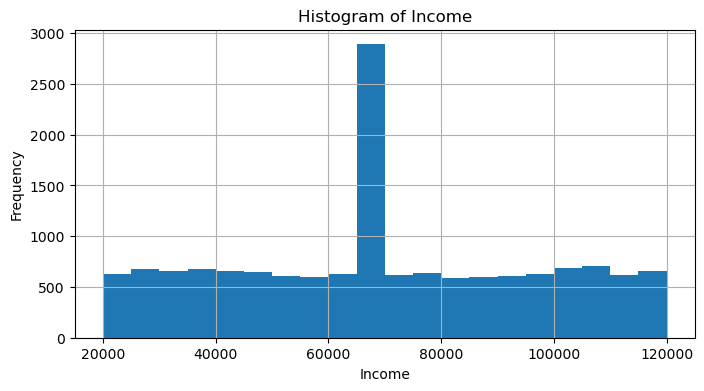

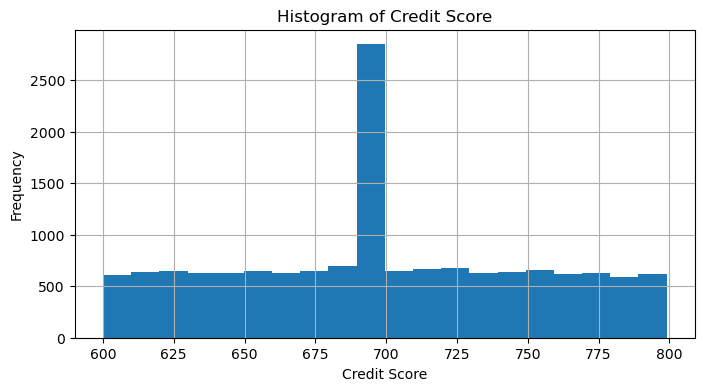

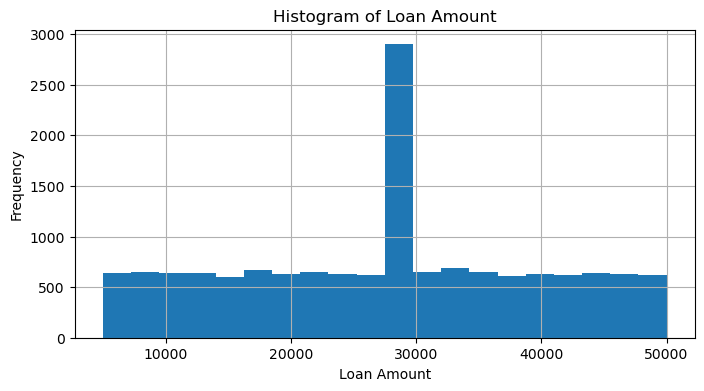

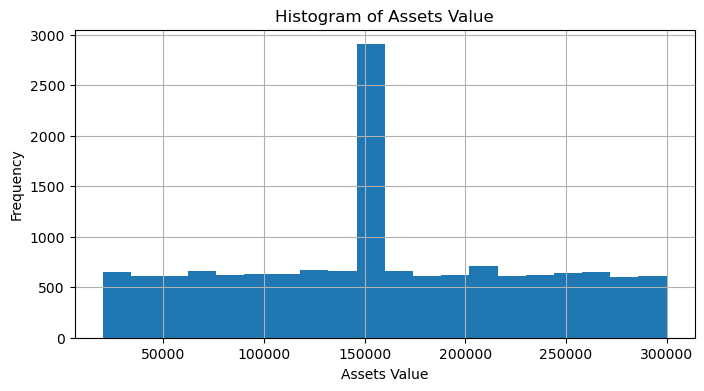

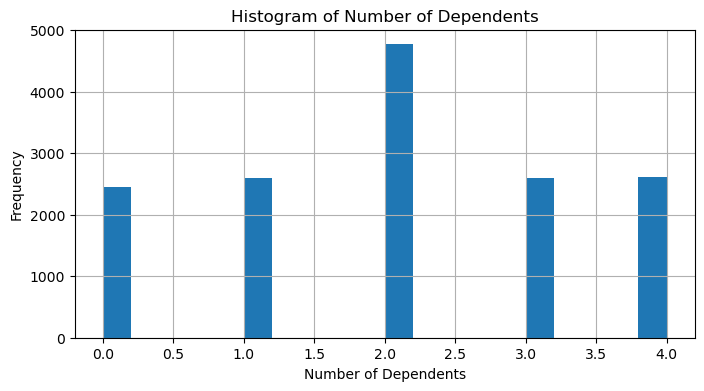

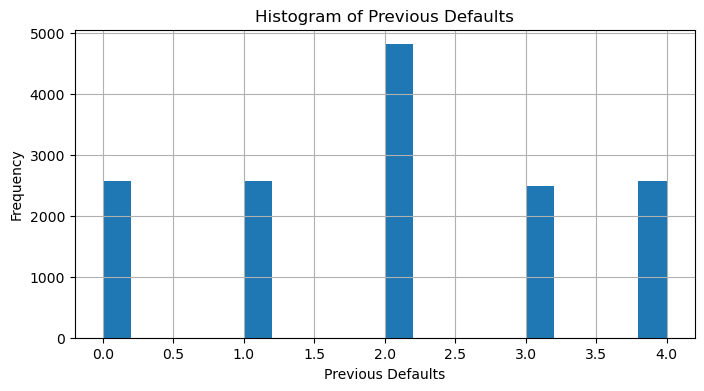

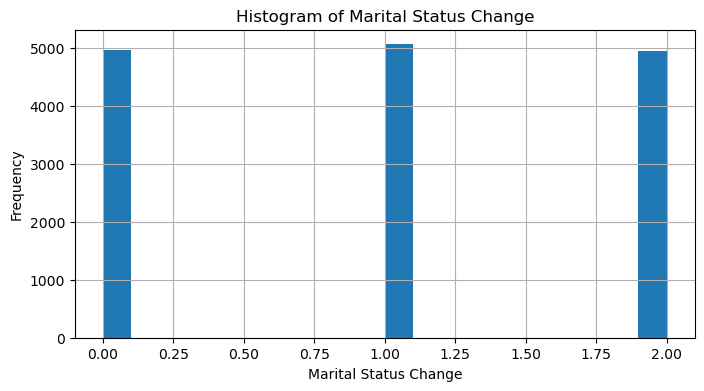

In [45]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame; replace with your actual DataFrame name
# List of numerical columns to analyze
numerical_cols = ['Age', 'Years at Current Job', 'Debt-to-Income Ratio', 'Income', 'Credit Score', 'Loan Amount', 'Assets Value', 
                  'Number of Dependents', 'Previous Defaults', 'Marital Status Change']

# Plot histograms for each column
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    data[col].hist(bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

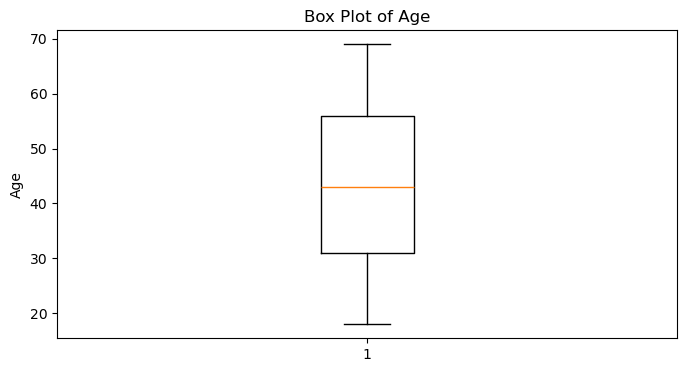

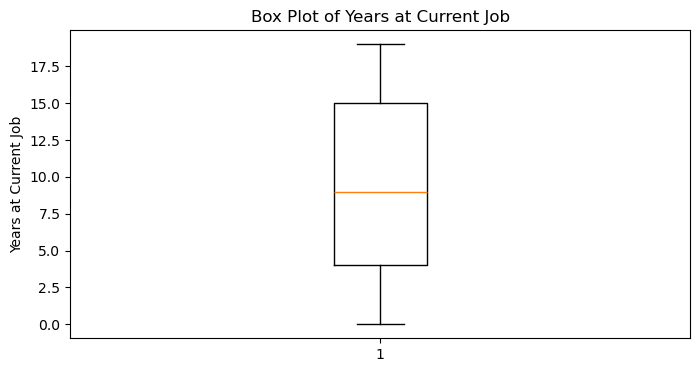

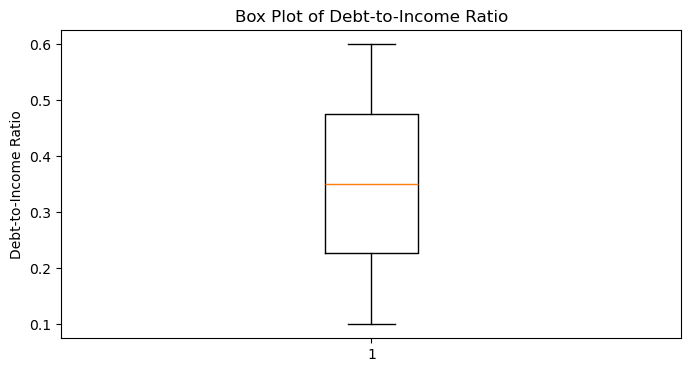

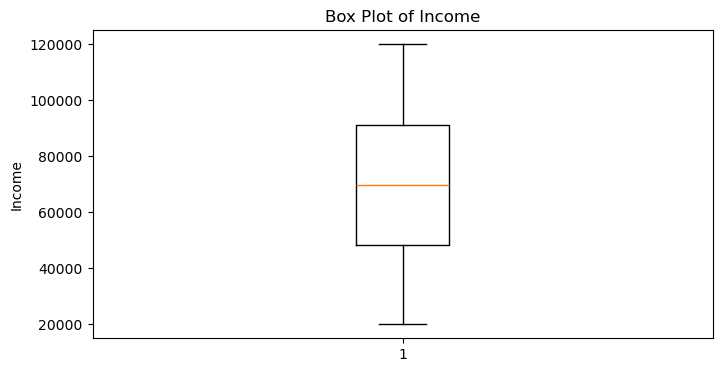

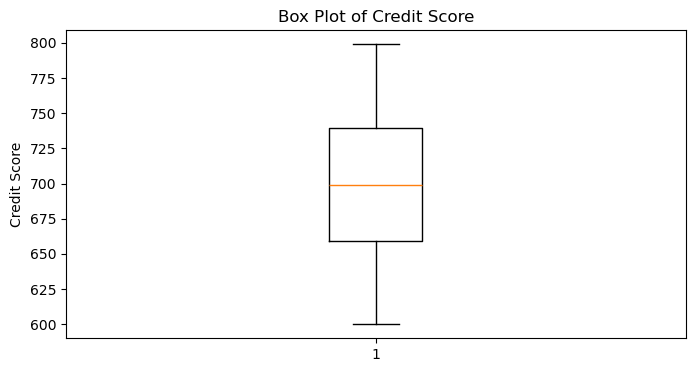

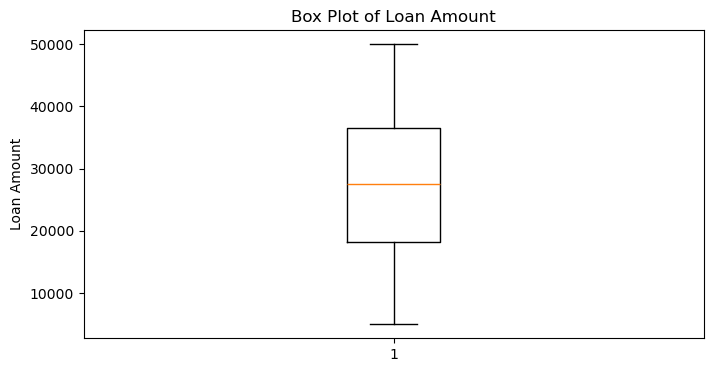

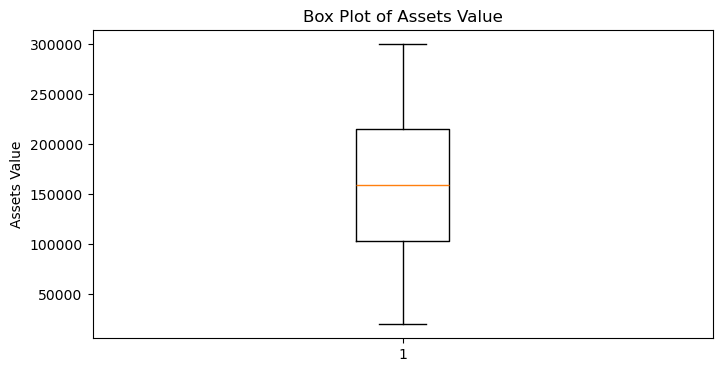

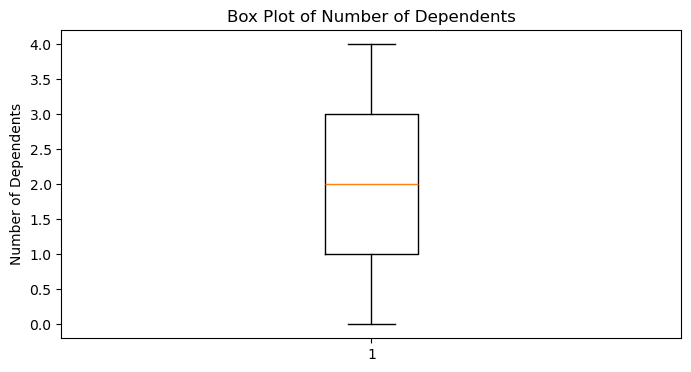

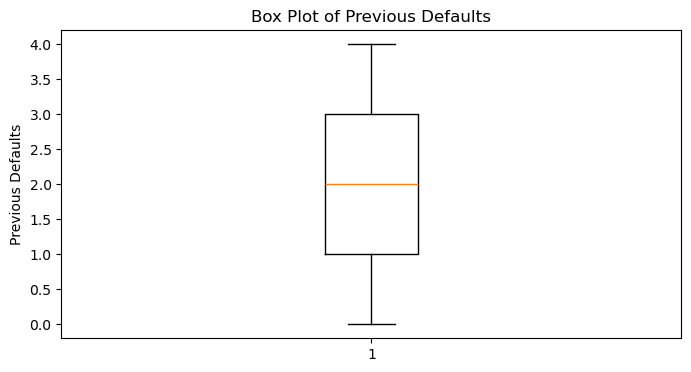

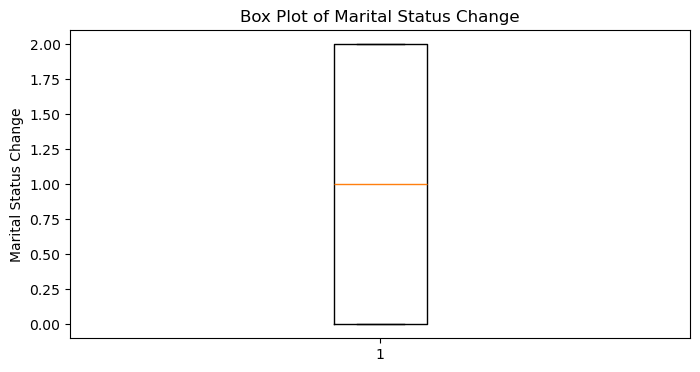

In [46]:
# Plot box plots for each column
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    plt.boxplot(data[col].dropna())  # Drop NaN to focus on existing data
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

In [47]:
from scipy import stats
import numpy as np

# Calculate z-scores and identify outliers for each column
for col in numerical_cols:
    z_scores = stats.zscore(data[col].dropna())  # Drop NaN for calculation
    outliers = data[col][np.abs(z_scores) > 3]
    print(f"\nOutliers in {col}:")
    print(outliers)


Outliers in Age:
Series([], Name: Age, dtype: int64)

Outliers in Years at Current Job:
Series([], Name: Years at Current Job, dtype: int64)

Outliers in Debt-to-Income Ratio:
Series([], Name: Debt-to-Income Ratio, dtype: float64)

Outliers in Income:
Series([], Name: Income, dtype: float64)

Outliers in Credit Score:
Series([], Name: Credit Score, dtype: float64)

Outliers in Loan Amount:
Series([], Name: Loan Amount, dtype: float64)

Outliers in Assets Value:
Series([], Name: Assets Value, dtype: float64)

Outliers in Number of Dependents:
Series([], Name: Number of Dependents, dtype: float64)

Outliers in Previous Defaults:
Series([], Name: Previous Defaults, dtype: float64)

Outliers in Marital Status Change:
Series([], Name: Marital Status Change, dtype: int64)


In [48]:
def simulate_approval(row):
    # Calculate loan-to-value ratio
    ltv_ratio = row['Loan Amount'] / row['Assets Value'] if row['Assets Value'] > 0 else float('inf')
    
    # Core conditions with some flexibility
    if ((row['Credit Score'] > 680 or (row['Credit Score'] > 650 and row['Income'] > 40000)) and
        row['Debt-to-Income Ratio'] < 0.43 and
        row['Previous Defaults'] == 0 and
        row['Income'] > 30000 and
        row['Assets Value'] > 50000 and
        ltv_ratio < 0.8 and
        row['Employment Status'] != 'Unemployed' and
        row['Years at Current Job'] >= 2):  # Stability indicator
        return 1  # Approved
    else:
        return 0  # Not Approved

In [49]:
# Apply the simulation function to create the target column
data['Loan_Approval'] = data.apply(simulate_approval, axis=1)

In [50]:
# Separate features and target
X = data.drop('Loan_Approval', axis=1)
y = data['Loan_Approval']

In [51]:
# Identify categorical columns from your dataset
categorical_cols = ['Gender', 'Education Level', 'Marital Status', 'Loan Purpose', 
                    'Employment Status', 'Payment History', 'City', 'State', 
                    'Country', 'Marital Status Change', 'Risk Rating']

In [52]:
# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep numerical columns as is
)

In [53]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [55]:
# Scale the features
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_preprocessed)
X_test_scaled = scaler.transform(X_test_preprocessed)

In [56]:
# Feature selection using Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [57]:
# Get feature importances and names
importances = rf_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()

In [58]:
# Select top 10 features
top_indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)[:10]
X_train_selected = X_train_scaled[:, top_indices]
X_test_selected = X_test_scaled[:, top_indices]

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

def compare_models(X, y, cv=5, scoring='accuracy'):
    models = {
        'Logistic Regression': LogisticRegression(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42)
    }
    print(f"\nComparing models using {cv}-fold cross-validation with {scoring} scoring:")
    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
        mean_score = scores.mean()
        std_score = scores.std()
        print(f"{name}: Mean {scoring} = {mean_score:.4f}, Std Dev = {std_score:.4f}")
    return models  # Optional: Return models for later use

In [60]:
# Display selected features
selected_features = [feature_names[i] for i in top_indices]
print("\nTop 10 selected features:")
print(selected_features)


Top 10 selected features:
['remainder__Previous Defaults', 'remainder__Debt-to-Income Ratio', 'remainder__Credit Score', 'remainder__Assets Value', 'cat__Employment Status_Unemployed', 'remainder__Income', 'remainder__Years at Current Job', 'remainder__Loan Amount', 'remainder__Age', 'cat__Employment Status_Employed']


In [61]:
# Compare models using cross-validation on the selected features
compare_models(X_train_selected, y_train)


Comparing models using 5-fold cross-validation with accuracy scoring:
Logistic Regression: Mean accuracy = 0.9773, Std Dev = 0.0027
Random Forest: Mean accuracy = 0.9980, Std Dev = 0.0007
Gradient Boosting: Mean accuracy = 0.9988, Std Dev = 0.0006


{'Logistic Regression': LogisticRegression(random_state=42),
 'Random Forest': RandomForestClassifier(random_state=42),
 'Gradient Boosting': GradientBoostingClassifier(random_state=42)}

In [62]:
# Train the final model (Logistic Regression)
final_model = LogisticRegression(random_state=42)
final_model.fit(X_train_selected, y_train)

LogisticRegression(random_state=42)

In [63]:
# Evaluate the model
y_pred = final_model.predict(X_test_selected)
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Evaluation:
Accuracy: 0.9756666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2864
           1       0.76      0.68      0.72       136

    accuracy                           0.98      3000
   macro avg       0.87      0.83      0.85      3000
weighted avg       0.97      0.98      0.97      3000



In [64]:
import pandas as pd

strong_applicant = {
    'Age': 40,
    'Gender': 'Male',
    'Education Level': 'Master',
    'Marital Status': 'Married',
    'Income': 80000,
    'Credit Score': 750,
    'Loan Amount': 20000,
    'Loan Purpose': 'Home',
    'Employment Status': 'Employed',
    'Years at Current Job': 10,
    'Payment History': 'Excellent',
    'Debt-to-Income Ratio': 0.2,
    'Assets Value': 150000,
    'Number of Dependents': 2,
    'City': 'New York',
    'State': 'NY',
    'Country': 'USA',
    'Previous Defaults': 0,
    'Marital Status Change': 'No',
    'Risk Rating': 'Low'
}

# Convert to DataFrame
applicant_df = pd.DataFrame([strong_applicant])

# Preprocess
applicant_preprocessed = preprocessor.transform(applicant_df)
applicant_scaled = scaler.transform(applicant_preprocessed)
applicant_selected = applicant_scaled[:, top_indices]

# Predict
prediction = final_model.predict(applicant_selected)
print(f"Strong Applicant Prediction: {'Approved' if prediction[0] == 1 else 'Denied'}")

Strong Applicant Prediction: Approved


In [65]:
weak_applicant = {
    'Age': 25,
    'Gender': 'Female',
    'Education Level': 'High School',
    'Marital Status': 'Single',
    'Income': 20000,
    'Credit Score': 550,
    'Loan Amount': 15000,
    'Loan Purpose': 'Car',
    'Employment Status': 'Unemployed',
    'Years at Current Job': 0,
    'Payment History': 'Poor',
    'Debt-to-Income Ratio': 0.6,
    'Assets Value': 10000,
    'Number of Dependents': 1,
    'City': 'Miami',
    'State': 'FL',
    'Country': 'USA',
    'Previous Defaults': 2,
    'Marital Status Change': 'Yes',
    'Risk Rating': 'High'
}

applicant_df = pd.DataFrame([weak_applicant])
applicant_preprocessed = preprocessor.transform(applicant_df)
applicant_scaled = scaler.transform(applicant_preprocessed)
applicant_selected = applicant_scaled[:, top_indices]
prediction = final_model.predict(applicant_selected)
print(f"Weak Applicant Prediction: {'Approved' if prediction[0] == 1 else 'Denied'}")

Weak Applicant Prediction: Denied


In [66]:
borderline_applicant = {
    'Age': 30,
    'Gender': 'Male',
    'Education Level': 'Bachelor',
    'Marital Status': 'Single',
    'Income': 45000,
    'Credit Score': 650,
    'Loan Amount': 12000,
    'Loan Purpose': 'Education',
    'Employment Status': 'Employed',
    'Years at Current Job': 2,
    'Payment History': 'Fair',
    'Debt-to-Income Ratio': 0.4,
    'Assets Value': 50000,
    'Number of Dependents': 0,
    'City': 'Chicago',
    'State': 'IL',
    'Country': 'USA',
    'Previous Defaults': 1,
    'Marital Status Change': 'No',
    'Risk Rating': 'Medium'
}

applicant_df = pd.DataFrame([borderline_applicant])
applicant_preprocessed = preprocessor.transform(applicant_df)
applicant_scaled = scaler.transform(applicant_preprocessed)
applicant_selected = applicant_scaled[:, top_indices]
prediction = final_model.predict(applicant_selected)
print(f"Borderline Applicant Prediction: {'Approved' if prediction[0] == 1 else 'Denied'}")

Borderline Applicant Prediction: Denied


In [67]:
import pickle

# Save the preprocessor
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the top feature indices
with open('top_indices.pkl', 'wb') as f:
    pickle.dump(top_indices, f)

# Save the final model
with open('final_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)

print("Model and preprocessing objects saved successfully!")

Model and preprocessing objects saved successfully!
